In [72]:
import pandas as pd
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
import os
os.chdir("C:\\Users\\dalto\\Desktop\\Estágio\\Data Science")

dol = pd.read_csv("dados_investpy.csv", sep = ",")
dol["Date"] = pd.to_datetime(dol["Date"]).dt.normalize()
dol = dol.set_index("Date")
dol.head()

,Abertura,Máxima,Mínima,Fechamento,BollingerSup,BollingerInf,BR1Y,BR3Y,BR10Y,US3M,US5Y,US10Y,BRENT,OURO,DXY,MXN
Date,,,,,,,,,,,,,,,,
2007-05-16,1985.0,1985.5,1954.0,1956.0,2062.50,1985.05,10.912,10.47,10.119,4.724,4.631,4.716,68.01,660.2,82.16,10.7782
2007-05-17,1954.5,1969.5,1953.5,1954.5,2068.42,1971.08,10.904,10.20,9.927,4.723,4.682,4.760,70.27,656.2,82.32,10.8142
2007-05-18,1955.0,1972.0,1955.0,1963.0,2070.48,1962.12,10.915,10.25,9.968,4.768,4.732,4.806,69.42,661.0,82.20,10.8000
2007-05-21,1956.0,1961.0,1940.0,1940.5,2074.92,1948.83,10.899,10.25,9.868,4.804,4.716,4.788,70.49,662.9,82.36,10.7665
2007-05-22,1942.0,1948.0,1934.5,1945.5,2075.32,1939.18,10.895,10.20,9.794,4.867,4.765,4.832,69.52,659.1,82.39,10.7960


In [56]:
df= pd.DataFrame()
df= dol[["Abertura", "Máxima", "Mínima", "Fechamento"]]        
df

,Abertura,Máxima,Mínima,Fechamento
Date,,,,
2007-05-16,1985.0,1985.5,1954.0,1956.0
2007-05-17,1954.5,1969.5,1953.5,1954.5
2007-05-18,1955.0,1972.0,1955.0,1963.0
2007-05-21,1956.0,1961.0,1940.0,1940.5
2007-05-22,1942.0,1948.0,1934.5,1945.5
...,...,...,...,...
2021-08-30,5200.0,5227.5,5183.0,5185.5
2021-08-31,5204.5,5219.5,5138.0,5178.5
2021-09-01,5174.0,5218.5,5162.5,5208.0


In [57]:
df=df.dropna(axis=0)
df.isna().sum().sum()

0

In [58]:
df["AbeMax"]= df["Máxima"]-df["Abertura"]
df["AbeMin"]= df["Abertura"]-df["Mínima"]
df["MaxMin"]= df["Máxima"]-df["Mínima"]
df

,Abertura,Máxima,Mínima,Fechamento,AbeMax,AbeMin,MaxMin
Date,,,,,,,
2007-05-16,1985.0,1985.5,1954.0,1956.0,0.5,31.0,31.5
2007-05-17,1954.5,1969.5,1953.5,1954.5,15.0,1.0,16.0
2007-05-18,1955.0,1972.0,1955.0,1963.0,17.0,0.0,17.0
2007-05-21,1956.0,1961.0,1940.0,1940.5,5.0,16.0,21.0
2007-05-22,1942.0,1948.0,1934.5,1945.5,6.0,7.5,13.5
...,...,...,...,...,...,...,...
2021-08-30,5200.0,5227.5,5183.0,5185.5,27.5,17.0,44.5
2021-08-31,5204.5,5219.5,5138.0,5178.5,15.0,66.5,81.5
2021-09-01,5174.0,5218.5,5162.5,5208.0,44.5,11.5,56.0


In [59]:
df.describe()

,Abertura,Máxima,Mínima,Fechamento,AbeMax,AbeMin,MaxMin
count,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000,3538.000000
mean,2894.217858,2915.827860,2874.032504,2894.669305,21.610003,20.185353,41.795356
std,1165.529853,1176.970781,1154.463902,1166.155655,24.723714,23.455972,32.943109
min,1535.000000,1542.000000,1529.500000,1540.000000,0.000000,0.000000,0.000000
25%,1861.375000,1875.250000,1848.500000,1863.250000,5.500000,5.500000,19.000000
50%,2397.750000,2412.250000,2370.000000,2393.000000,13.500000,12.500000,32.500000
75%,3736.875000,3765.375000,3713.375000,3737.625000,29.000000,26.500000,52.500000
max,5928.000000,5977.500000,5824.000000,5895.000000,193.500000,275.000000,311.000000


In [60]:
df=df.dropna(axis=0)
df.isna().sum().sum()

0

In [61]:
df["distMM5"] =df["Fechamento"] - df["Fechamento"].rolling(5).mean()
df["distMM20"] =df["Fechamento"] - df["Fechamento"].rolling(20).mean()
df["distMM50"] =df["Fechamento"] - df["Fechamento"].rolling(50).mean()
df["Z5"] = (df["Fechamento"]-(df["Fechamento"].rolling(5).mean()))/(df["Fechamento"].rolling(5).std())
df["Z20"] = (df["Fechamento"]-(df["Fechamento"].rolling(20).mean()))/(df["Fechamento"].rolling(20).std())
df["Z50"] = (df["Fechamento"]-(df["Fechamento"].rolling(50).mean()))/(df["Fechamento"].rolling(50).std())
df

,Abertura,Máxima,Mínima,Fechamento,AbeMax,AbeMin,MaxMin,distMM5,distMM20,distMM50,Z5,Z20,Z50
Date,,,,,,,,,,,,,
2007-05-16,1985.0,1985.5,1954.0,1956.0,0.5,31.0,31.5,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-17,1954.5,1969.5,1953.5,1954.5,15.0,1.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-18,1955.0,1972.0,1955.0,1963.0,17.0,0.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-21,1956.0,1961.0,1940.0,1940.5,5.0,16.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-22,1942.0,1948.0,1934.5,1945.5,6.0,7.5,13.5,-6.4,NaN,NaN,-0.718127,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-30,5200.0,5227.5,5183.0,5185.5,27.5,17.0,44.5,-41.0,-87.025,8.66,-1.148962,-1.213618,0.069722
2021-08-31,5204.5,5219.5,5138.0,5178.5,15.0,66.5,81.5,-32.3,-91.950,-1.56,-0.892858,-1.244675,-0.012780
2021-09-01,5174.0,5218.5,5162.5,5208.0,44.5,11.5,56.0,-0.9,-63.500,23.00,-0.025010,-0.872647,0.195009


In [62]:
df["FechamentoPct"] = df["Fechamento"].pct_change(1)

In [76]:
df.isna().sum()

Abertura         0
Máxima           0
Mínima           0
Fechamento       0
AbeMax           0
AbeMin           0
MaxMin           0
distMM5          0
distMM20         0
distMM50         0
Z5               0
Z20              0
Z50              0
FechamentoPct    0
dtype: int64

In [75]:
df=df.dropna(axis=0)
df.isna().sum().sum()

0

<AxesSubplot:xlabel='Date'>

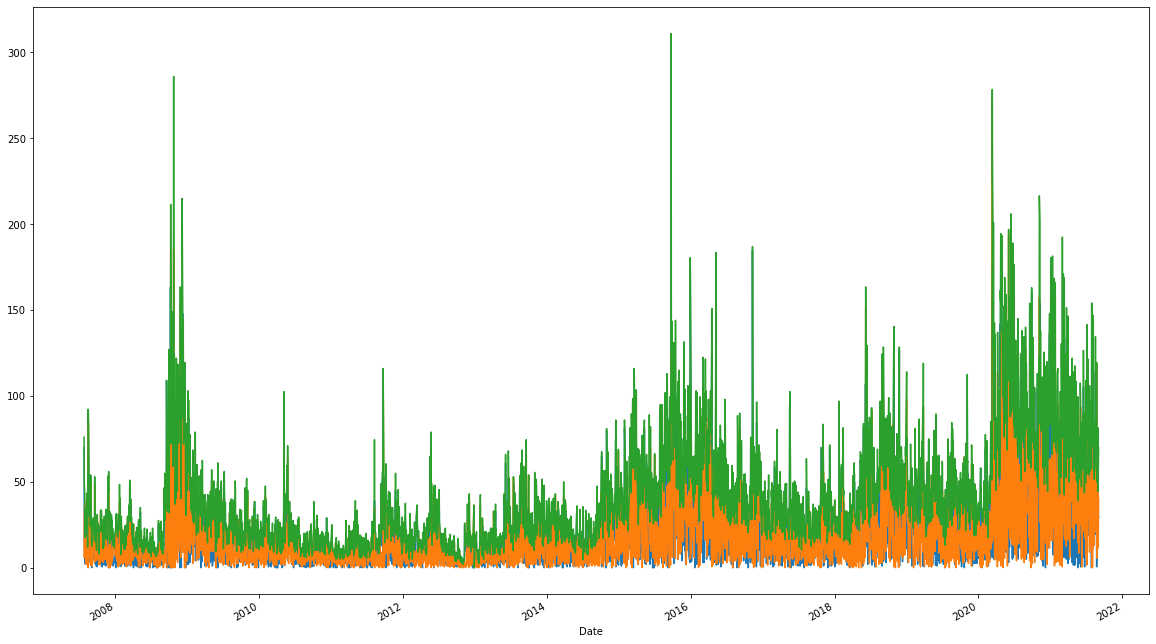

In [106]:
plt.figure(figsize=(20,12))
df["AbeMax"].plot()
df["AbeMin"].plot()
df["MaxMin"].plot()

<AxesSubplot:xlabel='Date'>

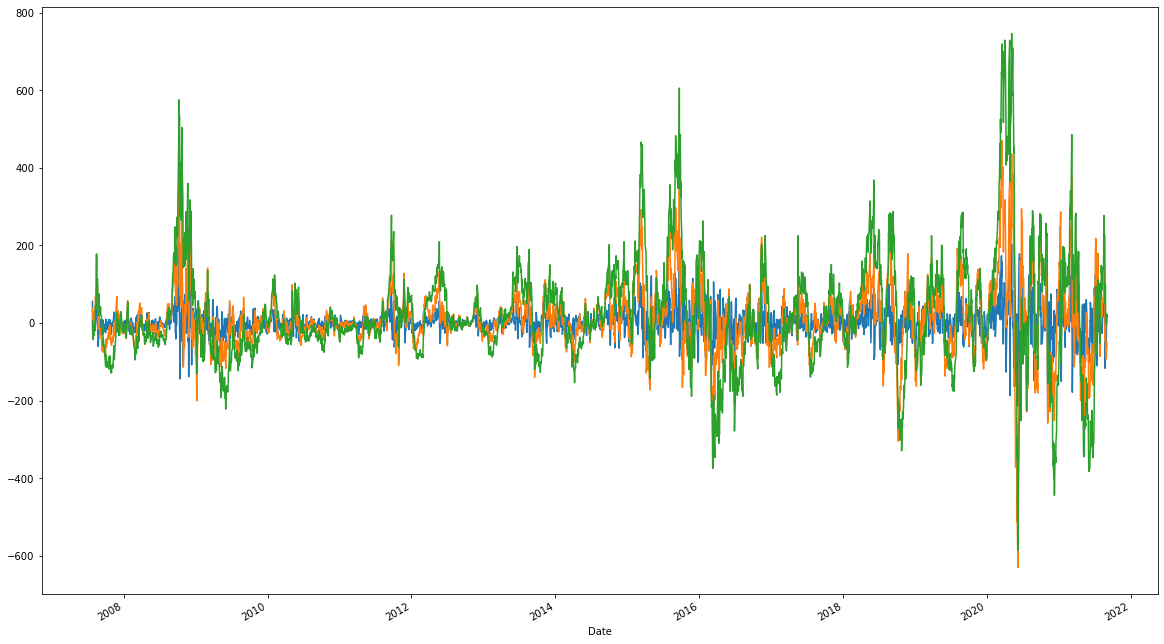

In [25]:
plt.figure(figsize=(20,12))
df["distMM5"].plot()
df["distMM20"].plot()
df["distMM50"].plot()
#df["FechamentoPct"].plot()

<AxesSubplot:xlabel='Date'>

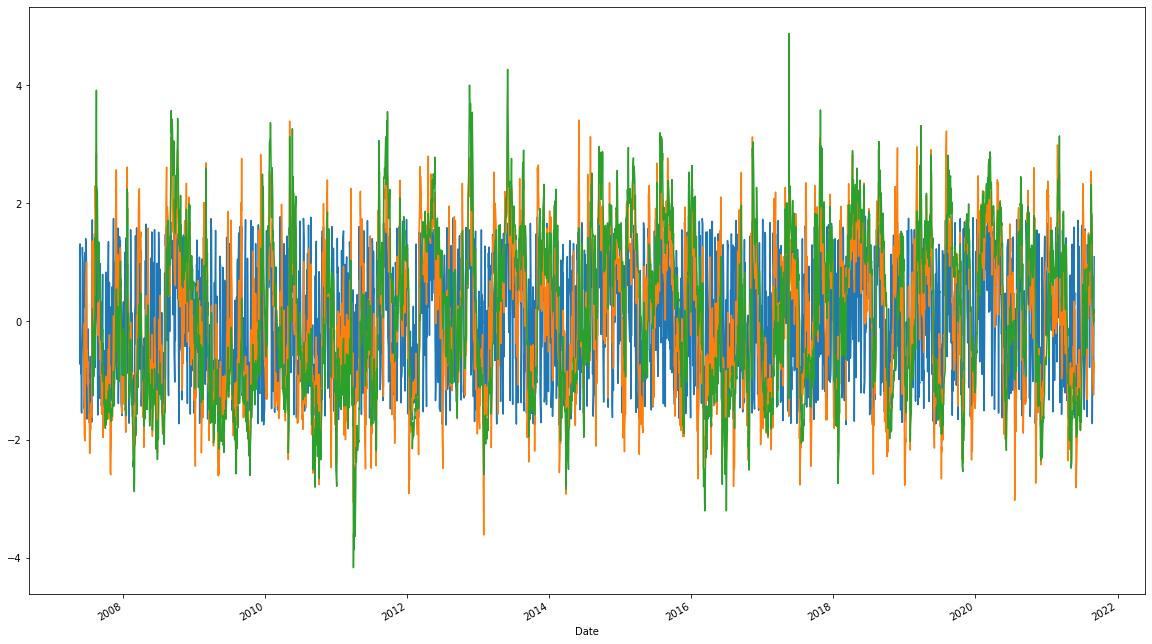

In [66]:
plt.figure(figsize=(20,12))
df["Z5"].plot()
df["Z20"].plot()
df["Z50"].plot()

<AxesSubplot:xlabel='Date'>

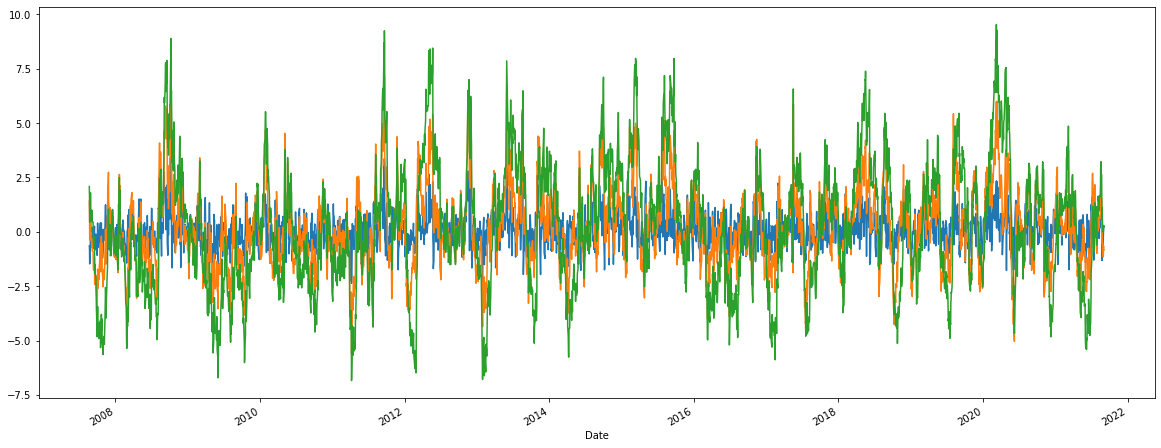

In [120]:
X = df["distMM5"]/(df["MaxMin"].rolling(20).mean())
Y = df["distMM20"]/(df["MaxMin"].rolling(20).mean())
Z = df["distMM50"]/(df["MaxMin"].rolling(20).mean())
plt.figure(figsize=(20,8))
X.plot()
Y.plot()
Z.plot()

<AxesSubplot:xlabel='Date'>

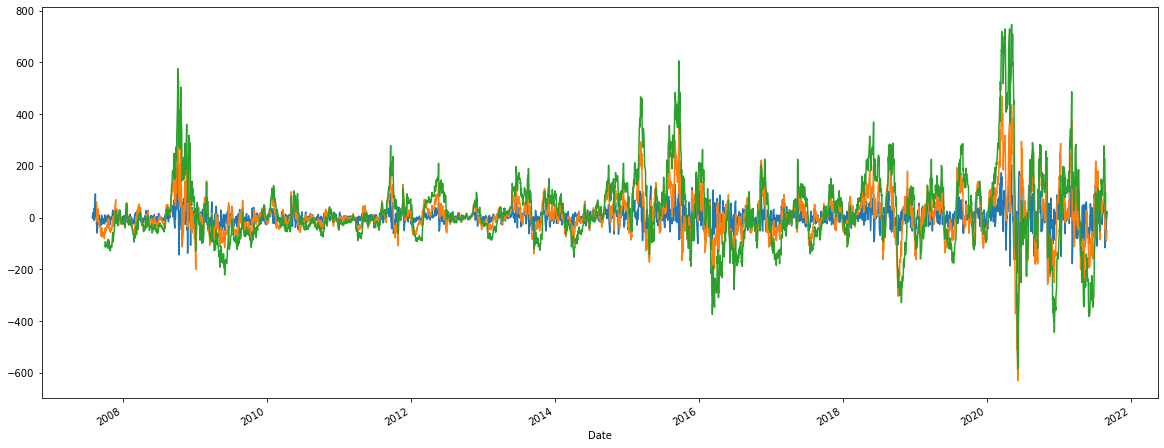

In [116]:
X = df["Fechamento"]-(df["Fechamento"].rolling(5).mean())
Y = df["Fechamento"]-(df["Fechamento"].rolling(20).mean())
Z = df["Fechamento"]-(df["Fechamento"].rolling(50).mean())
plt.figure(figsize=(20,8))
X.plot()
Y.plot()
Z.plot()

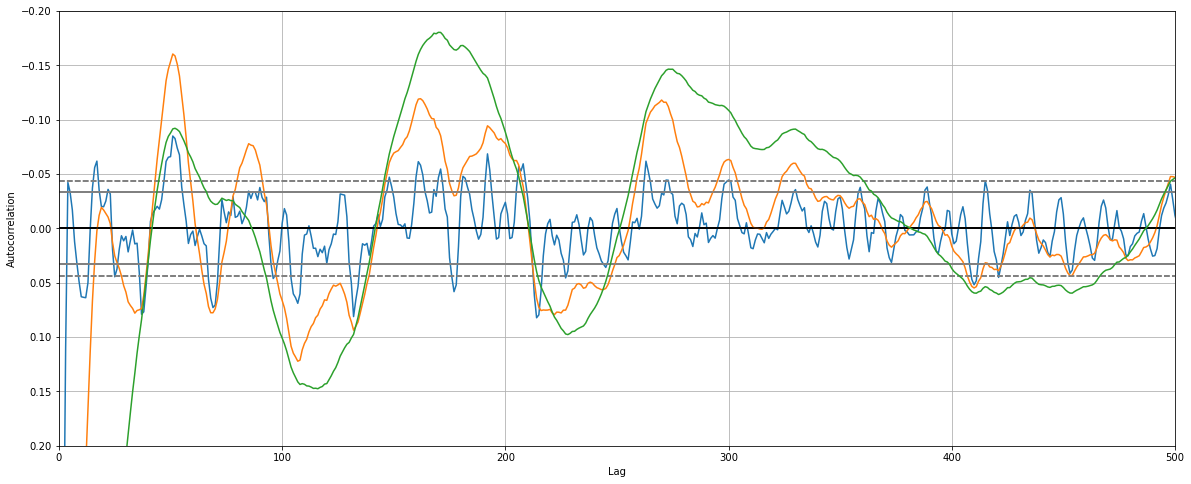

In [103]:

#autocorrelation_plot(df["FechamentoPct"])
autocorrelation_plot(df["distMM5"])
autocorrelation_plot(df["distMM20"])
autocorrelation_plot(df["distMM50"])
plt.ylim(0.2,-0.2)
plt.xlim(0,500)
plt.show()

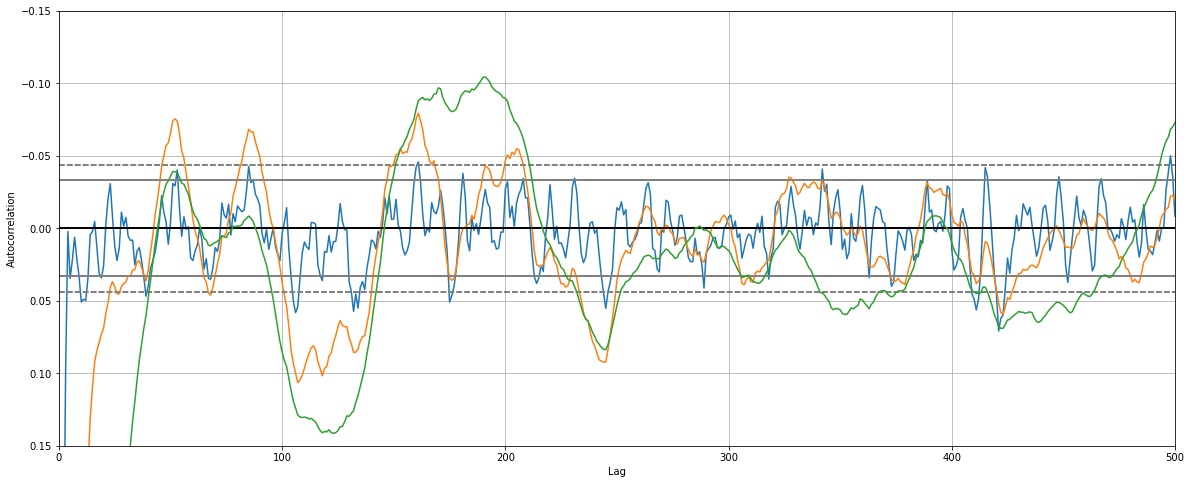

In [123]:
plt.figure(figsize=(20,8))
autocorrelation_plot(df["Z5"])
autocorrelation_plot(df["Z20"])
autocorrelation_plot(df["Z50"])
plt.ylim(0.15,-0.15)
plt.xlim(0,500)
plt.show()


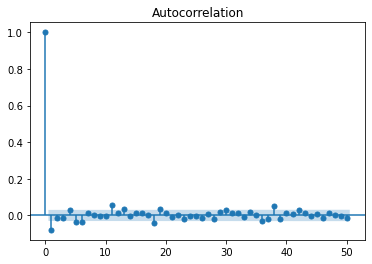

In [88]:
plot_acf(df["FechamentoPct"], lags = 50)
plt.show()

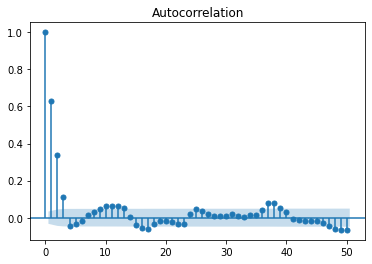

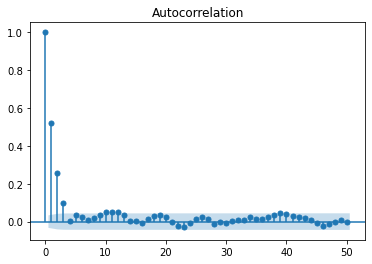

In [84]:
plot_acf(df["distMM5"], lags = 50)
plot_acf(df["Z5"], lags = 50)
plt.show()

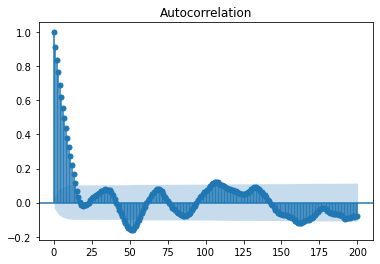

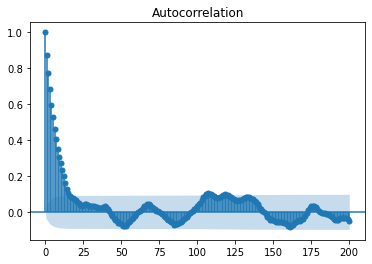

In [121]:
plot_acf(df["distMM20"], lags = 200)
plot_acf(df["Z20"], lags = 200)
plt.show()

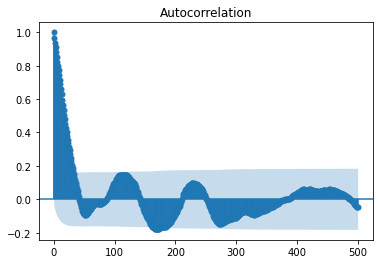

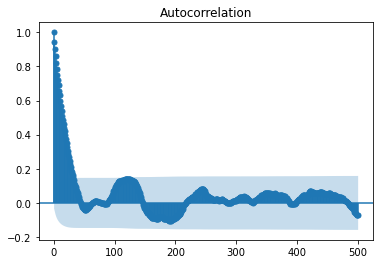

In [88]:
plot_acf(df["distMM50"], lags = 500)
plot_acf(df["Z50"], lags = 500)
plt.show()

In [90]:
from statsmodels.tsa.arima_model import ARIMA

In [93]:
model = ARIMA(df["Z20"], order=(15,1,1))

In [94]:
modelFit = model.fit()

In [95]:
modelFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Z20   No. Observations:                 3488
Model:                ARIMA(15, 1, 1)   Log Likelihood               -3342.174
Method:                       css-mle   S.D. of innovations              0.630
Date:                Sun, 19 Sep 2021   AIC                           6720.349
Time:                        16:36:35   BIC                           6831.176
Sample:                             1   HQIC                          6759.909
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0001   8.02e-05      1.845      0.065   -9.21e-06       0.000
ar.L1.D.Z20      0.8354      0.017     49.330      0.000       0.802       0.869
ar.L2.D.Z20      0.0457      0.022      2.071      0.038       0.002       0.089
ar.L3.D.Z20      0.0143      0.022      0.650      0.516      -0.029       0.058
ar.L4.D.Z20     -0.0359      0.022     -1.625      0.104      -0.079       0.007
ar.L5.D.Z20      0.0380      0.022      1.719      0.086      -0.005       0.081
ar.L6.D.Z20     -0.0257      0.022     -1.164      0.245      -0.069       0.018
ar.L7.D.Z20      0.0052      0.022      0.237      0.813      -0.038       0.049
ar.L8.D.Z20     -0.0077      0.022     -0.346      0.729      -0.051       0.036
ar.L9.D.Z20  -8.758e-05      0.022     -0.004      0.997      -0.043       0.043
ar.L10.D.Z20     0.0245      0.022      1.106      0.269      -0.019       0.068
ar.L11.D.Z20    -0.0068      0.022     -0.308      0.758      -0.050       0.037
ar.L12.D.Z20     0.0038      0.022      0.170      0.865      -0.040       0.047
ar.L13.D.Z20    -0.0094      0.022     -0.423      0.672      -0.053       0.034
ar.L14.D.Z20    -0.0404      0.022     -1.829      0.067      -0.084       0.003
ar.L15.D.Z20     0.0274      0.017      1.614      0.107      -0.006       0.061
ma.L1.D.Z20     -0.9999      0.001  -1080.447      0.000      -1.002      -0.998
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.2618           -0.2849j            1.2936           -0.4647
AR.2            -1.2618           +0.2849j            1.2936            0.4647
AR.3            -0.9792           -0.7620j            1.2408           -0.3947
AR.4            -0.9792           +0.7620j            1.2408            0.3947
AR.5            -0.5488           -1.1410j            1.2661           -0.3214
AR.6            -0.5488           +1.1410j            1.2661            0.3214
AR.7            -0.0059           -1.2778j            1.2779           -0.2507
AR.8            -0.0059           +1.2778j            1.2779            0.2507
AR.9             0.5431           -1.1167j            1.2418           -0.1780
AR.10            0.5431           +1.1167j            1.2418            0.1780
AR.11            1.0204           -0.7283j            1.2537           -0.0987
AR.12            1.0204           +0.7283j            1.2537            0.0987
AR.13            1.1997           -0.1024j            1.2041           -0.0136
AR.14            1.1997           +0.1024j            1.2041            0.0136
AR.15            1.5393           -0.0000j            1.5393           -0.0000
MA.1             1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------

In [96]:
residuals = pd.DataFrame(modelFit.resid)

<Figure size 1440x576 with 0 Axes>

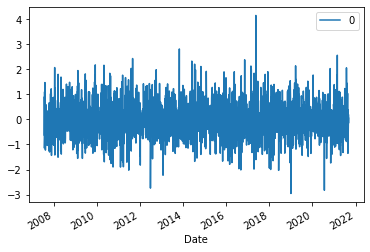

In [97]:
plt.figure(figsize=(20,8))
residuals.plot()
plt.show()

<Figure size 1440x576 with 0 Axes>

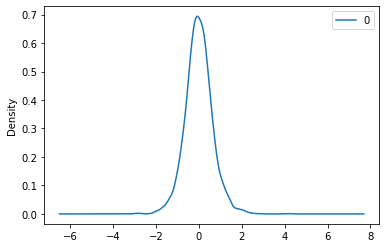

In [98]:
plt.figure(figsize=(20,8))
residuals.plot( kind='kde')
plt.show()

In [99]:
residuals.describe()

,0
count,3488.000000
mean,0.000341
std,0.630900
min,-2.953037
25%,-0.385073
50%,-0.016505
75%,0.369400
max,4.141413


In [100]:
(residuals**2).mean()

0    0.397921
dtype: float64

In [15]:
import requests 
import json
import matplotlib.dates as mdates
plt.style.use('Solarize_Light2')

In [ ]:
r = requests